In [1]:
# Loading libraries
from cellpose import plot
from cellpose import models
from cellpose import core, utils, io, models, metrics
from natsort import natsorted
from glob import glob
import os
from matplotlib import pyplot as plt
import numpy as np
import pathlib
current_dir = pathlib.Path().absolute()

In [2]:
# Directories
train_dir = "/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_human_in_the_loop/train" 
test_dir = "/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_human_in_the_loop/test"

# String to detect masks in the folder
string_masks='_masks'
# file extension
file_extension ='.tif'

# Loading files
train_files = natsorted(glob(train_dir+'/*'+file_extension))
train_seg = natsorted(glob(train_dir+'/*'+string_masks+file_extension))
test_files = natsorted(glob(test_dir+'/*'+file_extension))
test_seg = natsorted(glob(test_dir+'/*'+string_masks+file_extension))

# model output folder
model_name = "cyto_gapdh"
model_path = current_dir.joinpath('temp_models',model_name)
model_path.mkdir(parents=True, exist_ok=True)

In [3]:
# Parameters
initial_model = "nuclei" # ['cyto','nuclei','tissuenet','livecell','cyto2','CP','CPx','TN1','TN2','TN3','LC1','LC2','LC3','LC4','None']
#initial_model = '/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_models/model_test2/models/model_test2'
Channel_to_use_for_training = 0 #["0: Grayscale", "3: Blue", "2: Green", "1: Red"]
Second_training_channel= 0 # ["0: None", "3: Blue", "2: Green", "1: Red"]
channels = [Channel_to_use_for_training, Second_training_channel]

# Machine learning parameters
n_epochs =  100 #default, 500
learning_rate = 0.2 #default, 0.2
weight_decay = 0.00001 # default, 0.00001

In [4]:
# start logger (to see training across epochs)
logger = io.logger_setup()
# DEFINE CELLPOSE MODEL (without size model)
model = models.CellposeModel(gpu=True, pretrained_model=initial_model)
# get files
output = io.load_train_test_data(train_dir, test_dir, mask_filter=string_masks)
train_data, train_labels, _, test_data, test_labels, _ = output
new_model_path = model.train(train_data, train_labels, 
                              test_data=test_data,
                              test_labels=test_labels,
                              channels=channels, 
                              save_path=model_path, 
                              n_epochs=n_epochs,
                              learning_rate=learning_rate, 
                              weight_decay=weight_decay, 
                              nimg_per_epoch=8,
                              model_name=model_name)
# diameter of labels in training images
diam_labels = model.diam_labels.copy()

2023-12-12 11:07:02,235 [INFO] WRITING LOG OUTPUT TO /home/luisub/.cellpose/run.log
2023-12-12 11:07:02,236 [INFO] 
cellpose version: 	2.2.3 
platform:       	linux 
python version: 	3.8.12 
torch version:  	1.10.2
2023-12-12 11:07:02,237 [WARNING] pretrained model has incorrect path
2023-12-12 11:07:02,237 [INFO] >> cyto << model set to be used
2023-12-12 11:07:03,908 [INFO] ** TORCH CUDA version installed and working. **
2023-12-12 11:07:03,908 [INFO] >>>> using GPU
2023-12-12 11:07:04,025 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-12-12 11:07:04,029 [INFO] not all flows are present, running flow generation for all images
2023-12-12 11:07:04,044 [INFO] 15 / 15 images in /home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_human_in_the_loop/train folder have labels
2023-12-12 11:07:04,045 [INFO] not all flows are present, running flow generation for all images
2023-12-12 11:07:04,052 [INFO] 5 / 5 images in /home/luisub/Desktop/FISH_P

100%|██████████| 15/15 [00:01<00:00,  8.20it/s]


2023-12-12 11:07:06,375 [INFO] computing flows for labels


100%|██████████| 5/5 [00:00<00:00,  8.15it/s]

2023-12-12 11:07:07,144 [INFO] >>>> median diameter set to = 30
2023-12-12 11:07:07,145 [INFO] >>>> mean of training label mask diameters (saved to model) 88.707
2023-12-12 11:07:07,146 [INFO] >>>> training network with 2 channel input <<<<
2023-12-12 11:07:07,147 [INFO] >>>> LR: 0.20000, batch_size: 8, weight_decay: 0.00001
2023-12-12 11:07:07,147 [INFO] >>>> ntrain = 15, ntest = 5
2023-12-12 11:07:07,148 [INFO] >>>> nimg_per_epoch = 15


2023-12-12 11:07:07,782 [INFO] Epoch 0, Time  0.6s, Loss 2.6326, Loss Test 2.1756, LR 0.0000
2023-12-12 11:07:08,200 [INFO] saving network parameters to /home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_models/cyto_gapdh/models/cyto_gapdh
2023-12-12 11:07:09,990 [INFO] Epoch 5, Time  2.8s, Loss 1.3707, Loss Test 0.9473, LR 0.1111
2023-12-12 11:07:12,156 [INFO] Epoch 10, Time  5.0s, Loss 0.9424, Loss Test 2.6615, LR 0.2000
2023-12-12 11:07:16,413 [INFO] Epoch 20, Time  9.3s, Loss 0.4606, Loss Test 0.3975, LR 0.2000
2023-12-12 11:07:20,679 [INFO] Epoch 30, Time 13.5s, Loss 0.3260, Loss Test 0.3334, LR 0.2000
2023-12-12 11:07:24,948 [INFO] Epoch 40, Time 17.8s, Loss 0.2930, Loss Test 0.3150, LR 0.2000
2023-12-12 11:07:29,232 [INFO] Epoch 50, Time 22.1s, Loss 0.2700, Loss Test 0.2689, LR 0.2000
2023-12-12 11:07:33,513 [INFO] Epoch 60, Time 26.4s, Loss 0.2511, Loss Test 0.2631, LR 0.2000
2023-12-12 11:07:37,820 [INFO] Epoch 70, Time 30.7s, Loss 0.2448, Loss Test 0.2473, LR 0.2000


In [5]:
# get files (during training, test_data is transformed so we will load it again)
output = io.load_train_test_data(test_dir, mask_filter=string_masks)
test_data, test_labels = output[:2]

# run model on test images
masks = model.eval(test_data, channels=channels,diameter=diam_labels)[0]

# check performance using ground truth labels
ap = metrics.average_precision(test_labels, masks)[0]
print('')
print(f'>>> average precision at iou threshold 0.5 = {ap[:,0].mean():.3f}')

2023-12-12 11:07:50,345 [INFO] not all flows are present, running flow generation for all images
2023-12-12 11:07:50,352 [INFO] 5 / 5 images in /home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_human_in_the_loop/test folder have labels
2023-12-12 11:07:52,084 [INFO] 100%|##########| 5/5 [00:01<00:00,  2.89it/s]

>>> average precision at iou threshold 0.5 = 0.936


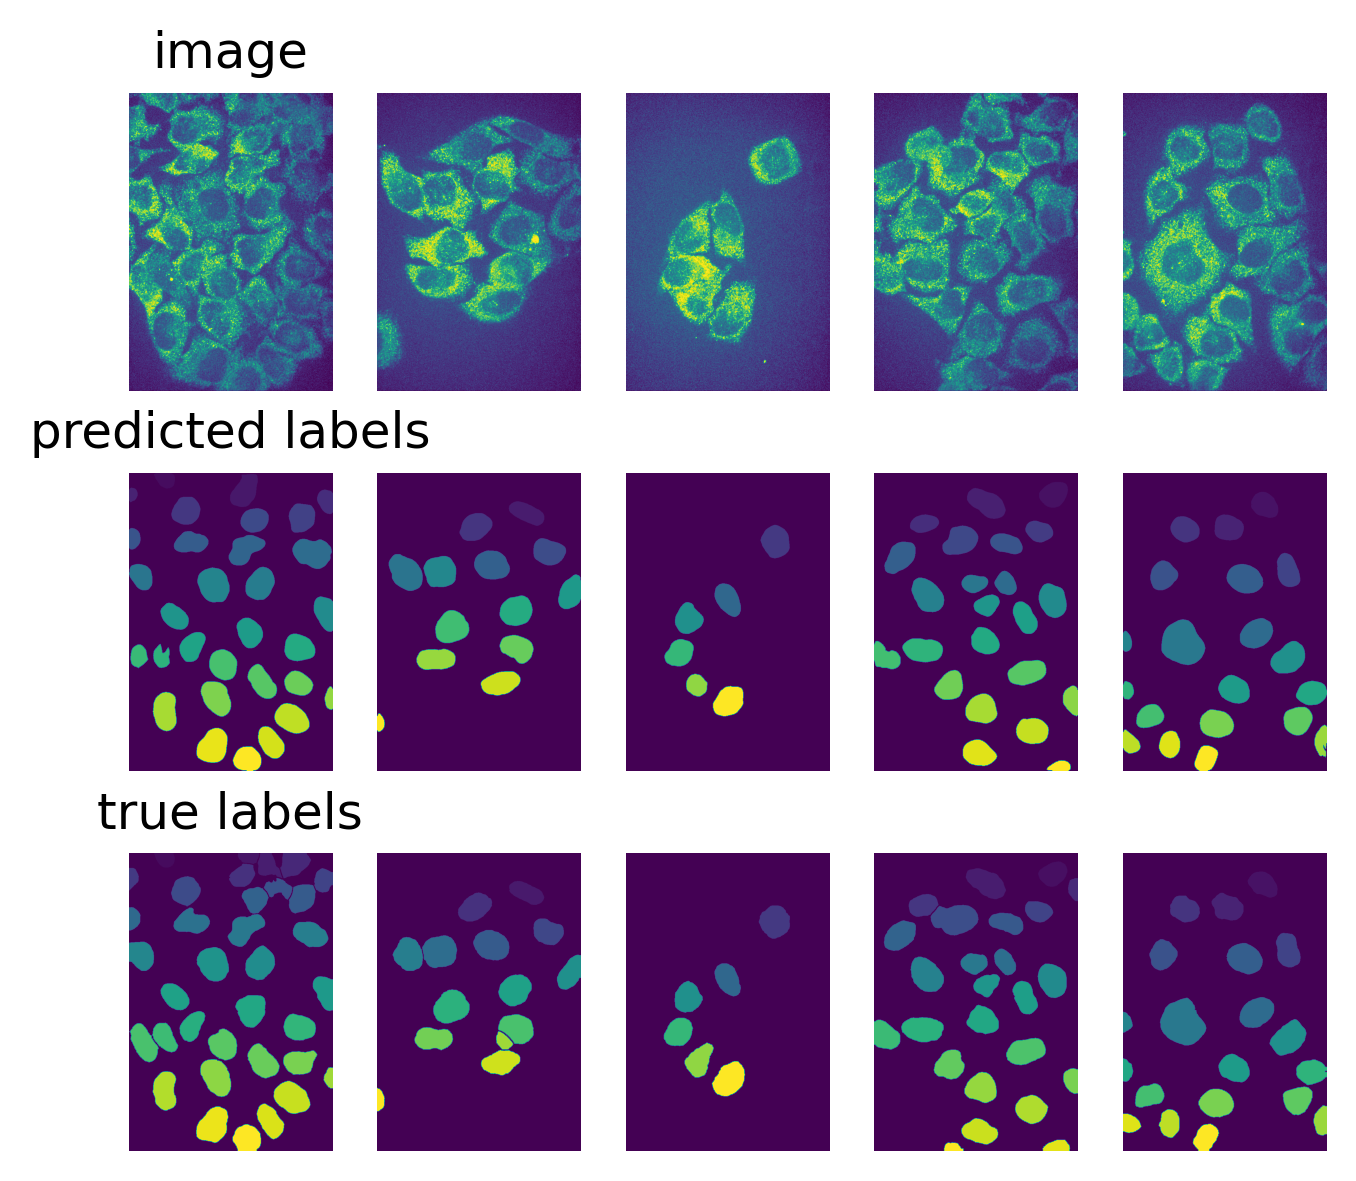

In [6]:
plt.figure(figsize=(25,4), dpi=300)
for k,im in enumerate(test_data):
    img = im.copy()
    plt.subplot(3,len(train_files), k+1)
    img = np.vstack((img, np.zeros_like(img)[:1]))
    plt.imshow(img)
    plt.axis('off')
    if k==0:
        plt.title('image')

    plt.subplot(3,len(train_files), len(train_files) + k+1)
    plt.imshow(masks[k])
    plt.axis('off')
    if k==0:
        plt.title('predicted labels')

    plt.subplot(3,len(train_files), 2*len(train_files) + k+1)
    plt.imshow(test_labels[k])
    plt.axis('off')
    if k==0:
        plt.title('true labels')
plt.tight_layout()

In [7]:
new_model_path

'/home/luisub/Desktop/FISH_Processing/cell_segmentation/temp_models/cyto_gapdh/models/cyto_gapdh'